ANYCHD _ KNN Classifier

In [5]:
#import dependencies
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [6]:
df = pd.read_csv("ANYCHD_final_data.csv")
df.head(20)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,PREVCHD,PREVAP,PREVMI,PREVSTRK,PREVHYP,PERIOD,DEATH,HOSPMI,ANYCHD,STROKE
0,2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,...,0,0,0,0,0,1,0,1,1,0
1,6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,...,0,0,0,0,0,1,0,0,0,0
2,9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,...,0,0,0,0,0,1,0,0,0,0
3,10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,...,0,0,0,0,1,1,1,0,0,1
4,11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,...,0,0,0,0,0,1,0,0,0,0
5,11263,2,228.0,43,180.0,110.0,0,0.0,30.30,0,...,0,0,0,0,1,1,0,0,1,0
6,12629,2,205.0,63,138.0,71.0,0,0.0,33.11,0,...,0,0,0,0,0,1,0,0,1,0
7,12806,2,313.0,45,100.0,71.0,1,20.0,21.68,0,...,0,0,0,0,0,1,0,0,0,0
8,14367,1,260.0,52,141.5,89.0,0,0.0,26.36,0,...,0,0,0,0,1,1,0,0,0,0
9,16365,1,225.0,43,162.0,107.0,1,30.0,23.61,0,...,0,0,0,0,1,1,0,0,0,0


In [7]:
ANYCHD_df = df.set_index('RANDID')
#Remove columns not involved in analysis
#removed 'Time', 'Period', 'Death', 'MI_FCHD', 'TIMEMI', 'TIMEMIFC'
ANYCHD_df = ANYCHD_df[['SEX', 'TOTCHOL', 'AGE', 'SYSBP', 'DIABP', 'CURSMOKE', 'CIGPDAY', 'BMI',
       'DIABETES', 'BPMEDS', 'HEARTRTE', 'GLUCOSE', 'PREVSTRK', 'PREVHYP', 'ANYCHD']]
ANYCHD_df.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVSTRK,PREVHYP,ANYCHD
RANDID,,,,,,,,,,,,,,,
2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0,1
6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0,0
9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0,0
10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,1,0
11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0,0


In [9]:
y = ANYCHD_df["ANYCHD"]
target_names = ["negative", "positive"]

In [10]:
X = ANYCHD_df.drop("ANYCHD", axis=1)
X.head()

,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,HEARTRTE,GLUCOSE,PREVSTRK,PREVHYP
RANDID,,,,,,,,,,,,,,
2448,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,80.0,77.0,0,0
6238,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,95.0,76.0,0,0
9428,1,245.0,48,127.5,80.0,1,20.0,25.34,0,0.0,75.0,70.0,0,0
10552,2,225.0,61,150.0,95.0,1,30.0,28.58,0,0.0,65.0,103.0,0,1
11252,2,285.0,46,130.0,84.0,1,23.0,23.10,0,0.0,85.0,85.0,0,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=49)


In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [13]:

# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


k: 1, Train/Test Score: 1.000/0.667
k: 3, Train/Test Score: 0.830/0.723
k: 5, Train/Test Score: 0.798/0.724
k: 7, Train/Test Score: 0.789/0.728
k: 9, Train/Test Score: 0.776/0.737
k: 11, Train/Test Score: 0.771/0.729
k: 13, Train/Test Score: 0.770/0.746
k: 15, Train/Test Score: 0.769/0.751
k: 17, Train/Test Score: 0.768/0.751
k: 19, Train/Test Score: 0.766/0.746


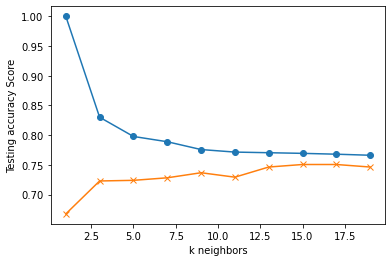

In [15]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [16]:
# Choose K = 13 from above and re-fit the KNN Classifier using that k value.
# Note that k = 13 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.746


In [42]:
#Make predictions (0 = no event occurred, 1 = event occurred)
predictions = knn.predict(X_test_scaled)
ANYCHD_predictions = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
ANYCHD_predictions

,Prediction,Actual
0,0,0
1,0,1
2,0,1
3,0,0
4,0,0
...,...,...
933,0,0
934,0,0
935,0,1
936,0,0


In [18]:

p0a0 = ANYCHD_predictions.loc[(ANYCHD_predictions['Prediction']==0) & (ANYCHD_predictions['Actual']==0)]
p1a1 = ANYCHD_predictions.loc[(ANYCHD_predictions['Prediction']==1) & (ANYCHD_predictions['Actual']==1)]
p0a1 = ANYCHD_predictions.loc[(ANYCHD_predictions['Prediction']==0) & (ANYCHD_predictions['Actual']==1)]
p1a0 = cvd_predictions.loc[(cvd_predictions['Prediction']==1) & (cvd_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0:  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1:  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1:  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0:  {len(p1a0)}")

Event prediction = 0 and actual = 0:  671
Event prediction = 1 and actual = 1:  29
Event prediction = 0 and actual = 1:  202
Event prediction = 1 and actual = 0:  36


Separate by gender

In [19]:
#filter df by gender (males = 1, females = 2)
male_ANYCHD = ANYCHD_df.loc[(ANYCHD_df["SEX"] ==1)]
female_ANYCHD = ANYCHD_df.loc[(ANYCHD_df["SEX"] ==2)]

In [20]:
male_ANYCHD_df = male_ANYCHD.drop('SEX', axis=1)
female_ANYCHD_df = female_ANYCHD.drop('SEX', axis=1)

In [21]:
y_male = male_ANYCHD_df["ANYCHD"]
male_target_names = ["negative", "positive"]

y_female = female_ANYCHD_df["ANYCHD"]
female_target_names = ["negative", "positive"]

In [22]:
X_male = male_ANYCHD_df.drop("ANYCHD", axis=1)
X_female = female_ANYCHD.drop("ANYCHD", axis=1)

In [23]:

X_male_train, X_male_test, y_male_train, y_male_test = train_test_split(X_male, y_male, random_state=49)
X_female_train, X_female_test, y_female_train, y_female_test = train_test_split(X_female, y_female, random_state=49)

In [24]:

# Create a StandardScater model and fit it to the training data - male

X_male_scaler = StandardScaler().fit(X_male_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_male_train_scaled = X_male_scaler.transform(X_male_train)
X_male_test_scaled = X_male_scaler.transform(X_male_test)

In [25]:

m_train_scores = []
m_test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_male_train_scaled, y_male_train)
    train_score = knn.score(X_male_train_scaled, y_male_train)
    test_score = knn.score(X_male_test_scaled, y_male_test)
    m_train_scores.append(train_score)
    m_test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


k: 1, Train/Test Score: 1.000/0.598
k: 3, Train/Test Score: 0.790/0.620
k: 5, Train/Test Score: 0.770/0.627
k: 7, Train/Test Score: 0.748/0.660
k: 9, Train/Test Score: 0.736/0.658
k: 11, Train/Test Score: 0.727/0.682
k: 13, Train/Test Score: 0.716/0.672
k: 15, Train/Test Score: 0.708/0.677
k: 17, Train/Test Score: 0.708/0.679
k: 19, Train/Test Score: 0.711/0.696


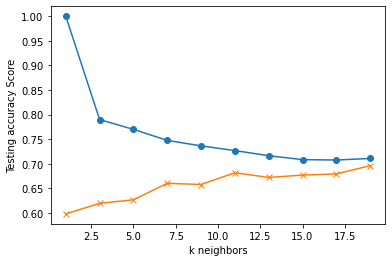

In [26]:
plt.plot(range(1, 20, 2), m_train_scores, marker='o')
plt.plot(range(1, 20, 2), m_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [27]:
# Choose K = 13 from above and re-fit the KNN Classifier using that k value.
# Note that k = 13 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_male_train_scaled, y_male_train)
print('k=13 Test Acc: %.3f' % knn.score(X_male_test_scaled, y_male_test))

k=13 Test Acc: 0.672


In [28]:
#Make predictions (0 = no event occurred, 1 = event occurred)
m_predictions = knn.predict(X_male_test_scaled)
m_ANYCHD_predictions = pd.DataFrame({"Prediction": m_predictions, "Actual": y_male_test}).reset_index(drop=True)
m_ANYCHD_predictions


,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
413,0,1
414,0,0
415,1,1
416,0,0


In [29]:
p0a0 = m_ANYCHD_predictions.loc[(m_ANYCHD_predictions['Prediction']==0) & (m_ANYCHD_predictions['Actual']==0)]
p1a1 = m_ANYCHD_predictions.loc[(m_ANYCHD_predictions['Prediction']==1) & (m_ANYCHD_predictions['Actual']==1)]
p0a1 = m_ANYCHD_predictions.loc[(m_ANYCHD_predictions['Prediction']==0) & (m_ANYCHD_predictions['Actual']==1)]
p1a0 = m_ANYCHD_predictions.loc[(m_ANYCHD_predictions['Prediction']==1) & (m_ANYCHD_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0 (male):  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1 (male):  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1 (male):  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0 (male):  {len(p1a0)}")

Event prediction = 0 and actual = 0 (male):  256
Event prediction = 1 and actual = 1 (male):  25
Event prediction = 0 and actual = 1 (male):  105
Event prediction = 1 and actual = 0 (male):  32


In [30]:
# Create a StandardScater model and fit it to the training data - female

X_female_scaler = StandardScaler().fit(X_female_train)

# Transform the training and testing data using the X_scaler and y_scaler models

X_female_train_scaled = X_female_scaler.transform(X_female_train)
X_female_test_scaled = X_female_scaler.transform(X_female_test)

In [31]:
f_train_scores = []
f_test_scores = []
for k in range(1, 30, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_female_train_scaled, y_female_train)
    train_score = knn.score(X_female_train_scaled, y_female_train)
    test_score = knn.score(X_female_test_scaled, y_female_test)
    f_train_scores.append(train_score)
    f_test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.745
k: 3, Train/Test Score: 0.866/0.781
k: 5, Train/Test Score: 0.835/0.806
k: 7, Train/Test Score: 0.828/0.812
k: 9, Train/Test Score: 0.817/0.818
k: 11, Train/Test Score: 0.813/0.818
k: 13, Train/Test Score: 0.813/0.818
k: 15, Train/Test Score: 0.815/0.835
k: 17, Train/Test Score: 0.814/0.821
k: 19, Train/Test Score: 0.812/0.818
k: 21, Train/Test Score: 0.810/0.821
k: 23, Train/Test Score: 0.807/0.821
k: 25, Train/Test Score: 0.811/0.823
k: 27, Train/Test Score: 0.811/0.818
k: 29, Train/Test Score: 0.814/0.818


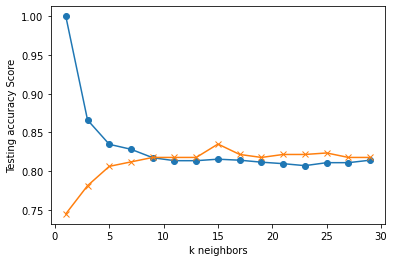

In [32]:
plt.plot(range(1, 30, 2), f_train_scores, marker='o')
plt.plot(range(1, 30, 2), f_test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [39]:
# Choose K = 15 from above and re-fit the KNN Classifier using that k value.
# Note that k = 15 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_female_train_scaled, y_female_train)
print('k=15 Test Acc: %.3f' % knn.score(X_female_test_scaled, y_female_test))

k=15 Test Acc: 0.835


In [40]:
#Make predictions (0 = no event occurred, 1 = event occurred)
f_predictions = knn.predict(X_female_test_scaled)
f_ANYCHD_predictions = pd.DataFrame({"Prediction": f_predictions, "Actual": y_female_test}).reset_index(drop=True)
f_ANYCHD_predictions

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
516,0,0
517,0,0
518,0,0
519,0,0


In [41]:
p0a0 = f_ANYCHD_predictions.loc[(f_ANYCHD_predictions['Prediction']==0) & (f_ANYCHD_predictions['Actual']==0)]
p1a1 = f_ANYCHD_predictions.loc[(f_ANYCHD_predictions['Prediction']==1) & (f_ANYCHD_predictions['Actual']==1)]
p0a1 = f_ANYCHD_predictions.loc[(f_ANYCHD_predictions['Prediction']==0) & (f_ANYCHD_predictions['Actual']==1)]
p1a0 = f_ANYCHD_predictions.loc[(f_ANYCHD_predictions['Prediction']==1) & (f_ANYCHD_predictions['Actual']==0)]

print(f"Event prediction = 0 and actual = 0 (female):  {len(p0a0)}")
print(f"Event prediction = 1 and actual = 1 (female):  {len(p1a1)}")
print(f"Event prediction = 0 and actual = 1 (female):  {len(p0a1)}")
print(f"Event prediction = 1 and actual = 0 (female):  {len(p1a0)}")

Event prediction = 0 and actual = 0 (female):  426
Event prediction = 1 and actual = 1 (female):  9
Event prediction = 0 and actual = 1 (female):  75
Event prediction = 1 and actual = 0 (female):  11
